# Decision Tree 

In [1]:
# importing dependiences
import numpy as np 
import pandas as pd
import seaborn as sb
import matplotlib as mp
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Reading Data

In [2]:
df = pd.read_csv("voice.csv")

# Converting Categorical Values into Numerical Values

In [3]:
df['label'] = [1 if i=='male' else 0 for i in df.label]
df.label.value_counts()

1    1584
0    1584
Name: label, dtype: int64

In [4]:
x = df.drop(['label'],axis=1)
y = df.label.values

# Splitting Dataset into Training and Testing Set¶

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 50)

# Decision Tree Using Entropy

In [6]:
# Implementing entropy
classifier= DecisionTreeClassifier(criterion='entropy',random_state = 30,max_depth=10, min_samples_leaf=8)  
classifier.fit(x_train, y_train)  
print("Decision Tree Classification Score: ",classifier.score(x_test,y_test))
predications = classifier.predict(x_test)
print ("Score on training dataset :",classifier.score(x_train,y_train))
print("Score on testing dataset :",classifier.score(x_test, y_test))
# using metrics module for accuracy calculation
print("Out of total 634 samples "+str(metrics.accuracy_score(y_test, predications,normalize = False))+" samples were predicted correctly")

Decision Tree Classification Score:  0.9511041009463722
Score on training dataset : 0.9865824782951855
Score on testing dataset : 0.9511041009463722
Out of total 634 samples 603 samples were predicted correctly


In [7]:
from sklearn.metrics import classification_report
report = classification_report(y_test,predications)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       324
           1       0.95      0.95      0.95       310

    accuracy                           0.95       634
   macro avg       0.95      0.95      0.95       634
weighted avg       0.95      0.95      0.95       634



# Confusion Matrix

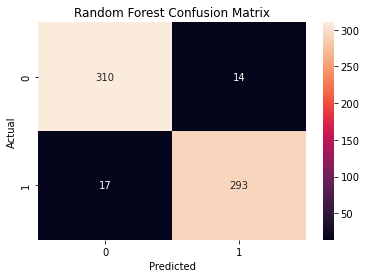

In [8]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,predications)
sb.heatmap(conf_matrix,annot=True,fmt=".0f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Random Forest Confusion Matrix")
plt.show()

# Decision Tree Using Gini

In [9]:
# Implementing gini
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 30,max_depth=10, min_samples_leaf=8)
clf_gini.fit(x_train, y_train) 
print("Decision Tree Classification Score: ",classifier.score(x_test,y_test))
predications = classifier.predict(x_test)
print ("Score on training dataset :",classifier.score(x_train,y_train))
print("Score on testing dataset :",classifier.score(x_test, y_test))
# using metrics module for accuracy calculation
print("Out of total 634 samples "+str(metrics.accuracy_score(y_test, predications,normalize = False))+" samples were predicted correctly")

Decision Tree Classification Score:  0.9511041009463722
Score on training dataset : 0.9865824782951855
Score on testing dataset : 0.9511041009463722
Out of total 634 samples 603 samples were predicted correctly


In [10]:
from sklearn.metrics import classification_report
report = classification_report(y_test,predications)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       324
           1       0.95      0.95      0.95       310

    accuracy                           0.95       634
   macro avg       0.95      0.95      0.95       634
weighted avg       0.95      0.95      0.95       634



# Confusion Matrix

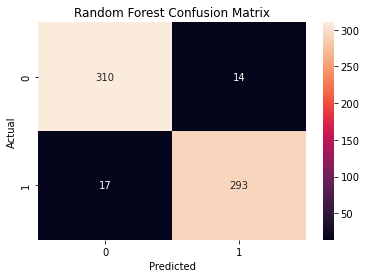

In [11]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,predications)
sb.heatmap(conf_matrix,annot=True,fmt=".0f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Random Forest Confusion Matrix")
plt.show()

In [15]:
classifier= DecisionTreeClassifier(criterion='entropy', random_state = 30,max_depth=5, min_samples_leaf=4)  
classifier.fit(x_train, y_train)  
predications = classifier.predict(x_test)
print ("Score on training dataset :",classifier.score(x_train,y_train))
print("Score on testing dataset :",classifier.score(x_test, y_test))
# using metrics module for accuracy calculation
print("Out of total 634 samples "+str(metrics.accuracy_score(y_test, predications,normalize = False))+" samples were predicted correctly")

Score on training dataset : 0.9850039463299132
Score on testing dataset : 0.9542586750788643
Out of total 634 samples 605 samples were predicted correctly


In [16]:
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 30,max_depth=5, min_samples_leaf=4)
clf_gini.fit(x_train, y_train) 
print ("Score on training dataset :",classifier.score(x_train,y_train))
print("Score on testing dataset :",classifier.score(x_test, y_test))
# using metrics module for accuracy calculation
print("Out of total 634 samples "+str(metrics.accuracy_score(y_test, predications,normalize = False))+" samples were predicted correctly")

Score on training dataset : 0.9850039463299132
Score on testing dataset : 0.9542586750788643
Out of total 634 samples 605 samples were predicted correctly


# Important Features

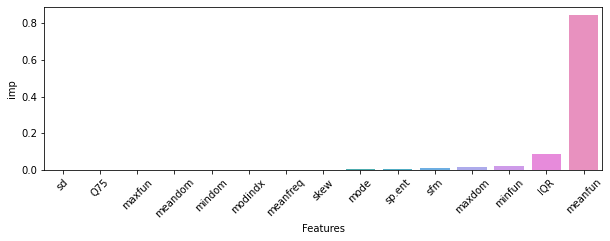

In [17]:
imp = classifier.feature_importances_
data = pd.DataFrame({"Features": x_train.columns,"imp":imp})
data.set_index("imp")
data = data.sort_values("imp")
plt.figure(figsize=(10,3))
plt.xticks(rotation=45)
sb.barplot(x="Features",y="imp",data=data)

# GridSearchCV

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(x_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:   33.6s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [60]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=18, random_state=42)

In [18]:
classifier= DecisionTreeClassifier(criterion='entropy', random_state = 42, max_leaf_nodes=18)  
classifier.fit(x_train, y_train)  
predications = classifier.predict(x_test)
print ("Score on training dataset :",classifier.score(x_train,y_train))
print("Score on testing dataset :",classifier.score(x_test, y_test))
# using metrics module for accuracy calculation
print("Out of total 634 samples "+str(metrics.accuracy_score(y_test, predications,normalize = False))+" samples were predicted correctly")

Score on training dataset : 0.9830307813733228
Score on testing dataset : 0.9558359621451105
Out of total 634 samples 606 samples were predicted correctly


# ROC Curve

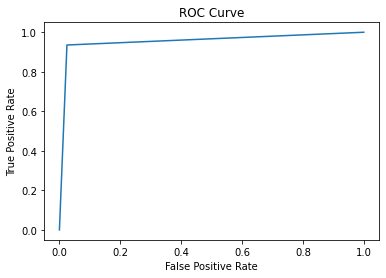

Area Under ROC Curve: 0.9553962564715254


In [20]:
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, thresholds = metrics.roc_curve(y_test, predications, pos_label=0)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve")
plt.plot(tpr1,fpr1)
plt.show()
auc = np.trapz(fpr1,tpr1)
print("Area Under ROC Curve:", auc)

# Recursive Feature Elimination

In [21]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator = classifier,step=1)
rfe.fit(x_train,y_train)
x_train_selected = rfe.transform(x_train)
x_test_selected = rfe.transform(x_test)

In [22]:
selected_features = pd.DataFrame({'Feature':list(x_train.columns),
                         'Ranking':rfe.ranking_})
selected_features.sort_values(by = 'Ranking')

,Feature,Ranking
2,Q75,1
3,IQR,1
6,sfm,1
7,mode,1
8,meanfun,1
9,minfun,1
13,maxdom,1
14,modindx,2
11,meandom,3
12,mindom,4


In [24]:
classifier.fit(x_train_selected,y_train)
print("Scores After Recursive Feature Elimination :",format(classifier.score(x_test_selected,y_test)))
classifier.fit(x_train,y_train)
print("Scores :",format(classifier.score(x_test,y_test)))

Scores After Recursive Feature Elimination : 0.9542586750788643
Scores : 0.9558359621451105
